<a href="https://colab.research.google.com/github/sebsnaranjo/MachineLearning/blob/main/ArbolesDeDecision-Casas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [22]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

In [18]:
boston = load_boston(return_X_y=False)
boston

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [19]:
# Se unen los datos (predictores y variable respuesta en unico dataframe)
#Conjunto tipo diccionario de esos datos
boston = load_boston(return_X_y=False)
#Apilamiento en columnas
datos = np.column_stack((boston.data, boston.target))
#Datos en forma bidimensional
datos = pd.DataFrame(datos,columns = np.append(boston.feature_names,"MEDV"))
datos.head(3)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [23]:
X_train, X_test, y_train, y_test, = train_test_split(
    datos.drop(columns = "MEDV"),
    datos['MEDV'],
    random_state = 123
)
#Creacion del modelo
modelo = DecisionTreeRegressor(
    max_depth=3,
    random_state = 123
)
#Entrenamiento del modelo
modelo.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=123)

Profundidad del arbol: 3
Numero de nodos terminales: 8


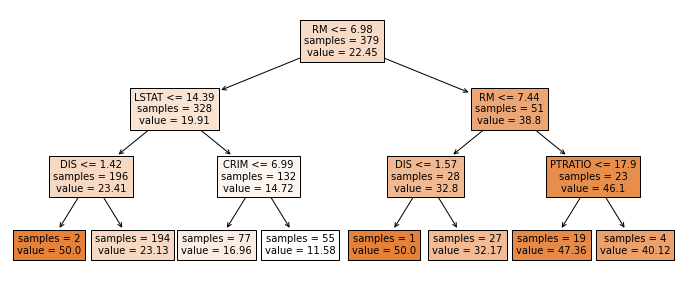

In [24]:
fig, ax = plt.subplots(figsize=(12,5))

print(f"Profundidad del arbol: {modelo.get_depth()}")
print(f"Numero de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
    decision_tree= modelo,
    feature_names= datos.drop(columns="MEDV").columns,
    class_names= 'MEDV',
    filled= True,
    impurity= False,
    fontsize=10,
    precision=2,
    ax=ax
)

In [26]:
texto_modelo = export_text(
    decision_tree = modelo,
    feature_names = list(datos.drop(columns = "MEDV").columns)
)
print(texto_modelo)

|--- RM <= 6.98
|   |--- LSTAT <= 14.39
|   |   |--- DIS <= 1.42
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.42
|   |   |   |--- value: [23.13]
|   |--- LSTAT >  14.39
|   |   |--- CRIM <= 6.99
|   |   |   |--- value: [16.96]
|   |   |--- CRIM >  6.99
|   |   |   |--- value: [11.58]
|--- RM >  6.98
|   |--- RM <= 7.44
|   |   |--- DIS <= 1.57
|   |   |   |--- value: [50.00]
|   |   |--- DIS >  1.57
|   |   |   |--- value: [32.17]
|   |--- RM >  7.44
|   |   |--- PTRATIO <= 17.90
|   |   |   |--- value: [47.36]
|   |   |--- PTRATIO >  17.90
|   |   |   |--- value: [40.12]



In [29]:
importancia_predictores=pd.DataFrame(
    {
        'predictor': datos.drop(columns = "MEDV").columns,
        'importancia': modelo.feature_importances_}
)
print("importancia de los predictores en el modelo")
importancia_predictores.sort_values('importancia', ascending=False)

importancia de los predictores en el modelo


,predictor,importancia
5,RM,0.671680
12,LSTAT,0.222326
7,DIS,0.064816
0,CRIM,0.034714
10,PTRATIO,0.006465
1,ZN,0.000000
2,INDUS,0.000000
3,CHAS,0.000000
4,NOX,0.000000
6,AGE,0.000000


In [30]:
#Error del test del modelo inicial
predicciones= modelo.predict(X= X_test)

rmse = mean_squared_error(
    y_true = y_test,
    y_pred = predicciones,
    squared = False
)
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 6.358813326315407


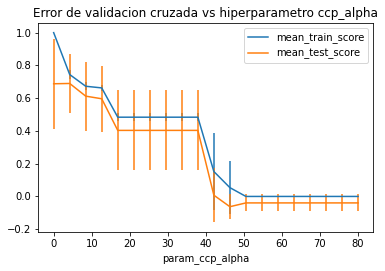

In [40]:
param_grid={'ccp_alpha':np.linspace(0,80,20)}
#Busqueda por validacion cruzada
grid = GridSearchCV(
    estimator = DecisionTreeRegressor(
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=123
    ),
    param_grid=param_grid,
    cv=10,
    refit=True,
    return_train_score=True
)
grid.fit(X_train, y_train)

fig, ax = plt.subplots(figsize=(6,3.84))
scores=pd.DataFrame(grid.cv_results_)
scores.plot(x='param_ccp_alpha',y='mean_train_score', yerr='std_train_score', ax=ax)
scores.plot(x='param_ccp_alpha',y='mean_test_score', yerr='std_test_score', ax=ax)
ax.set_title("Error de validacion cruzada vs hiperparametro ccp_alpha");

In [41]:
#Mejor valor ccp_alpha encontrado
grid.best_params_

{'ccp_alpha': 4.2105263157894735}

Profundidad del arbol: 2
Numero de nodos terminales 4


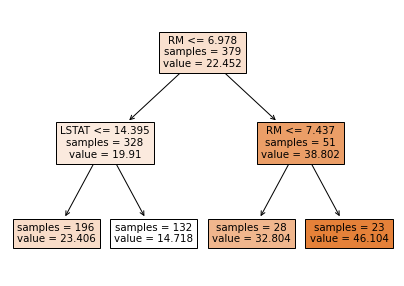

In [45]:
#Estructura del arbol final
modelo_final = grid.best_estimator_
print(f"Profundidad del arbol: {modelo_final.get_depth()}")
print(f"Numero de nodos terminales {modelo_final.get_n_leaves()}")

fig, ax= plt.subplots(figsize=(7,5))
plot = plot_tree(
    decision_tree = modelo_final,
    feature_names = datos.drop(columns="MEDV").columns,
    class_names = 'MEDV',
    filled= True,
    impurity=False,
    ax=ax
)